# Traffic model research

In [1]:
from src import traffic_model as model
from joblib import Parallel, delayed
import numpy as np
import joblib
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import ticker

In [2]:
import matplotlib.animation as animation

## Research human drive vehicle

In [3]:
np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)

### Single line

__Test__

In [3]:
road_param = {
    "N_cells": 1000,
    "N_lane": 1,
}
cars = {model.HumanDriveVehicle: 200}

In [4]:
model_1 = model.Model(road_parametrs=road_param, vehicles=cars)

In [5]:
%%time
model_1.model_stabilization(2000)

CPU times: total: 45.6 s
Wall time: 45.8 s


In [6]:
model_1.model_research(100)

In [7]:
model_1.result

{'rho': 0.2, 'flow': array([0.29446]), 'change_frequency': 0.0}

__Fundamential diagramm__

In [ ]:
core = joblib.cpu_count() - 2
cars_arr = np.arange(1000, step=50)[1:]
cars_arr

In [ ]:
def step(cars):
    road_param = {
        "N_cells": 1000,
        "N_lane": 1,
    }
    cars = {model.HumanDriveVehicle: cars}
    road = model.Model(road_parametrs=road_param, vehicles=cars)
    road.model_stabilization(1000)
    road.model_research(100)
    return road.result

In [ ]:
%%time
tabel_result = Parallel(n_jobs=core, verbose=10)(delayed(step)(cars) for cars in cars_arr)

In [ ]:
result = pd.DataFrame(tabel_result)
result

In [ ]:
%matplotlib inline 
%config InlineBackend.figure_format = 'svg' 
rc = {"font.family" : "serif", 
      "mathtext.fontset" : "stix"}
plt.rcParams.update(rc)
plt.rcParams["font.serif"] = ["Times New Roman"] + plt.rcParams["font.serif"]
fs = 16

fig = plt.figure(figsize=(10,6), dpi=300)

label = "$p_{slow} = $"+str(0.5)
plt.plot(result['rho'], result['flow'], label=label)

plt.ylim(0,0.6)
plt.xlim(0,1)
plt.legend(loc='upper right', fontsize=fs)
plt.xlabel(r'Density [Vehicle/cell]',  fontsize = fs)
plt.ylabel(r'Flow [Vechicle/time step]',  fontsize = fs)
plt.title(r'NaSch model with different probability to slow', fontsize=fs)
plt.grid(linewidth=0.5)
plt.show()

__Visualization__

In [258]:
road_param = {
    "N_cells": 100,
    "N_lane": 1,
}
cars = {model.HumanDriveVehicle: 30}

In [259]:
model_vis = model.Model(road_parametrs=road_param, vehicles=cars)

In [260]:
%%time
model_vis.model_stabilization(1000)

CPU times: total: 3.8 s
Wall time: 3.86 s


In [261]:
model_vis.model_research(200, is_diagramm=True)

In [262]:
layers = model_vis.x_t_diagramm[0]

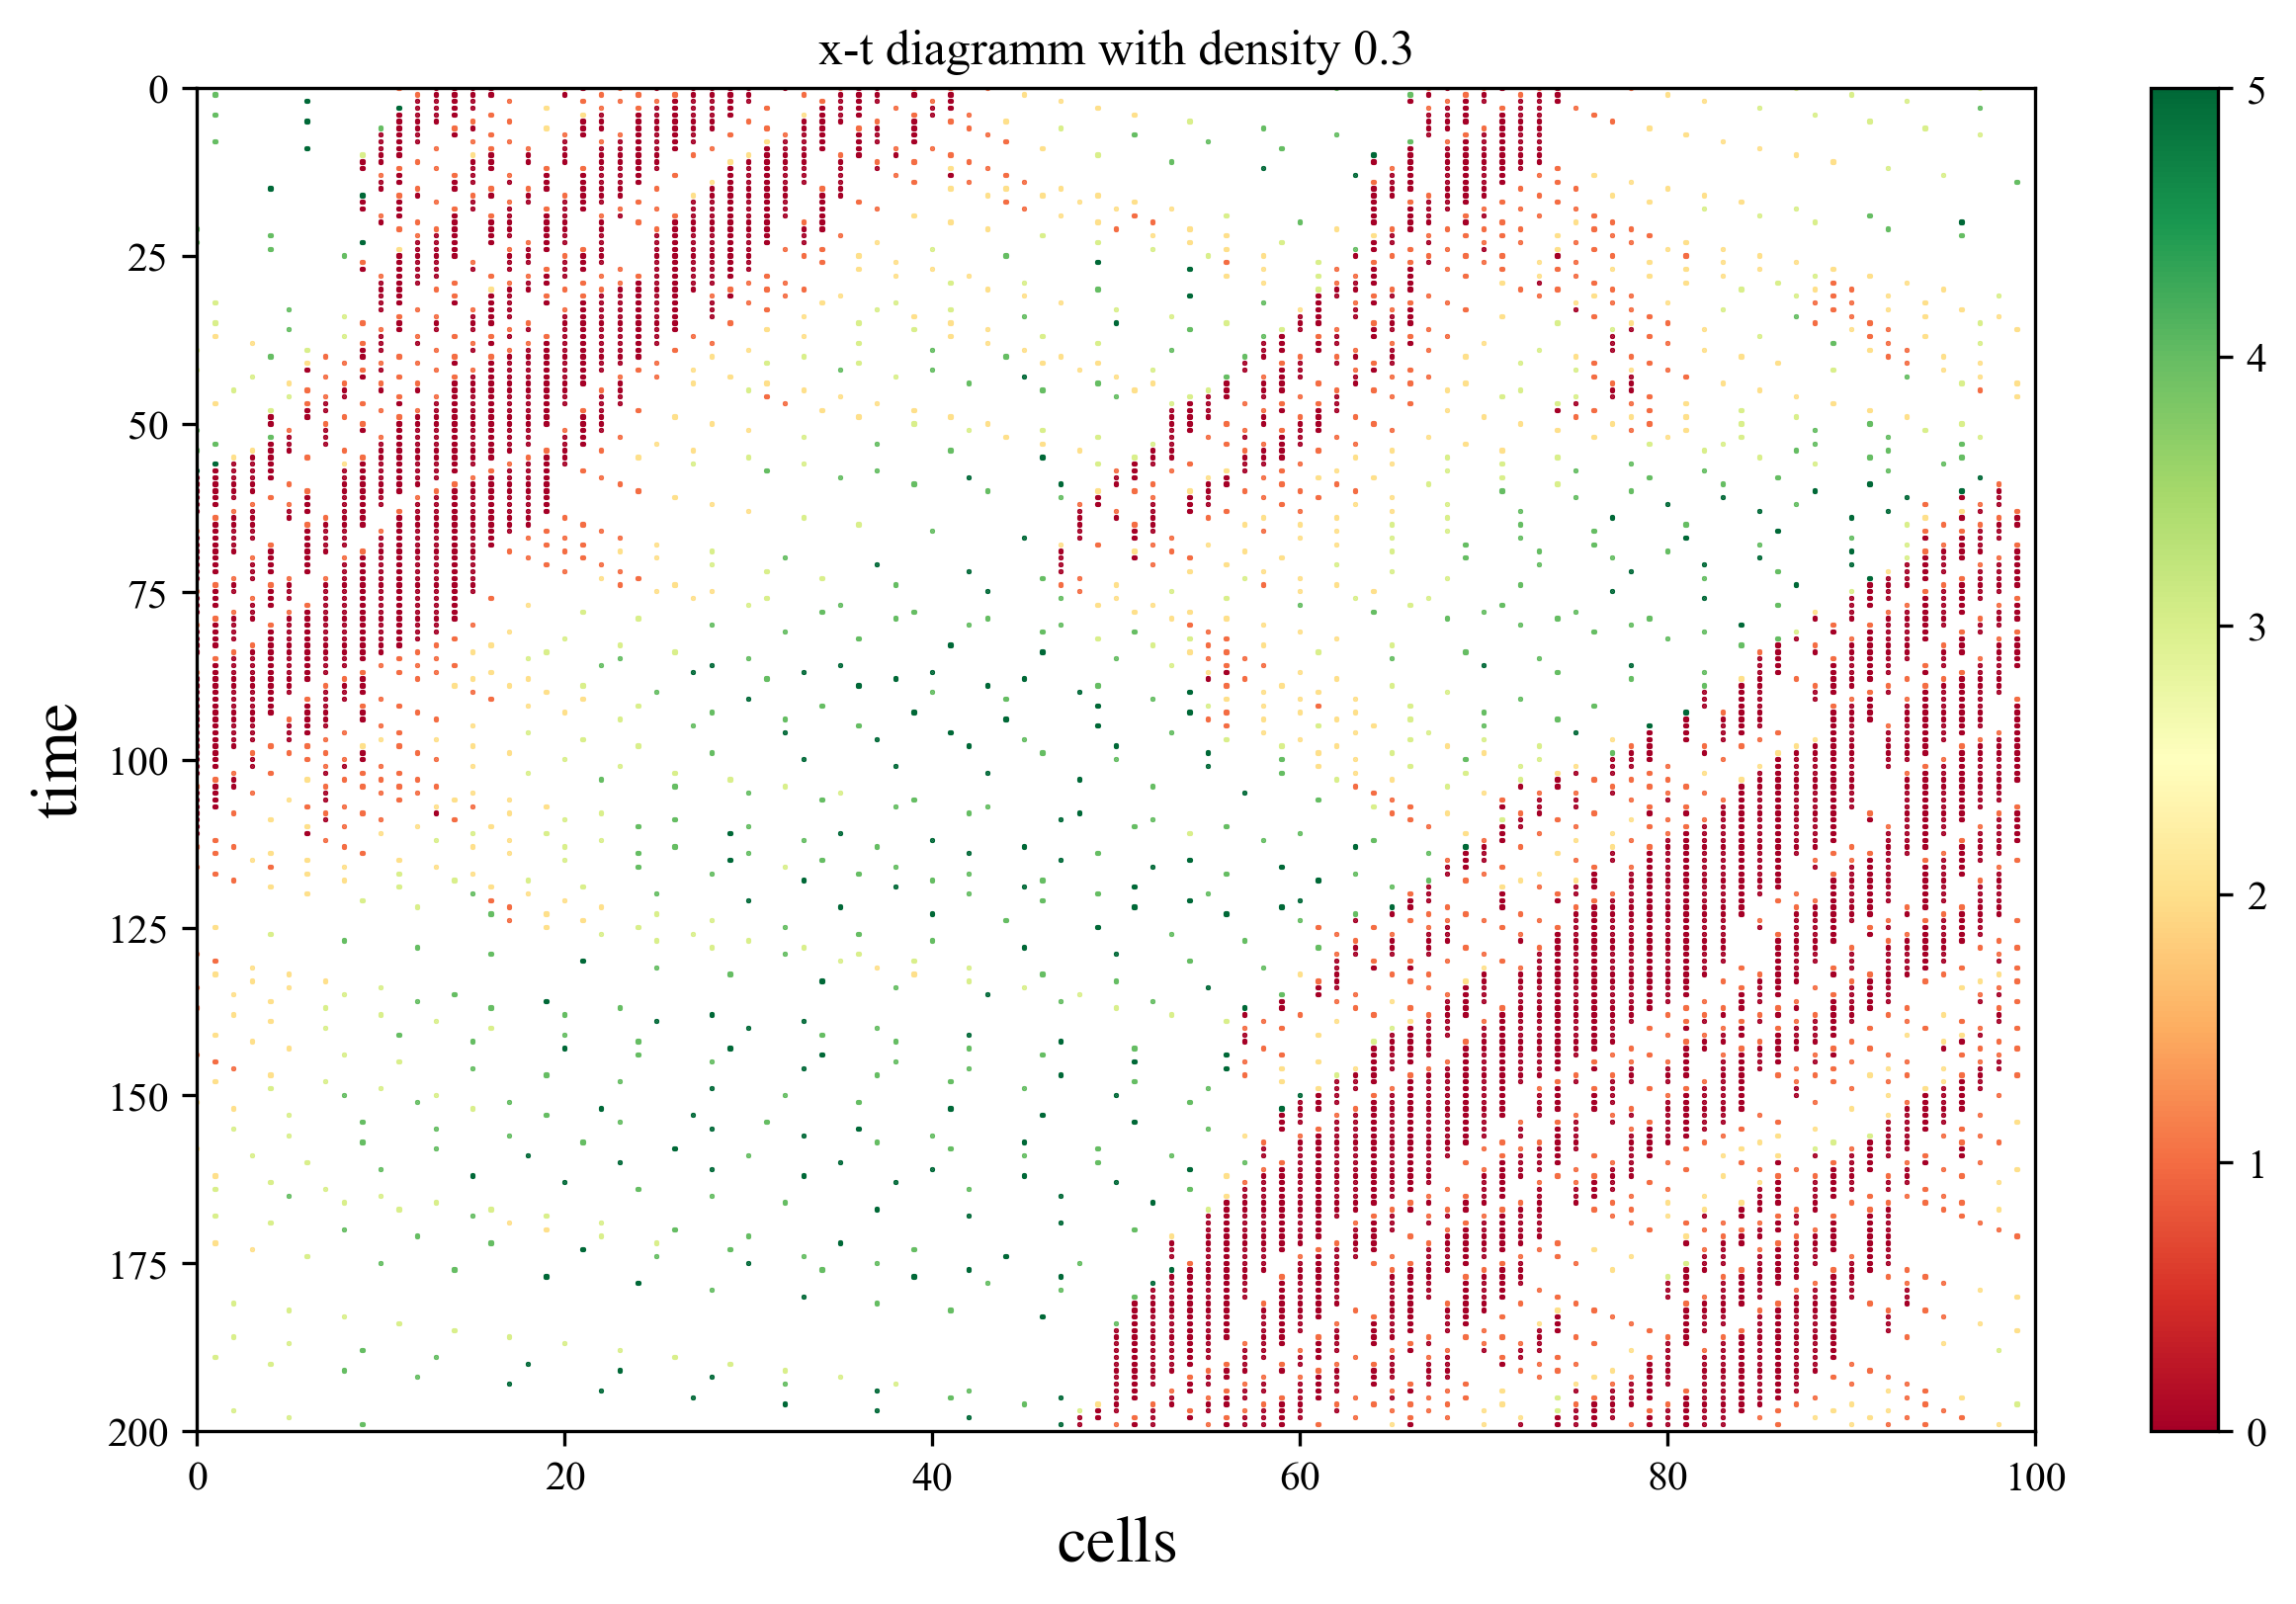

In [263]:
%matplotlib inline 
%config InlineBackend.figure_format = 'svg' 
rc = {"font.family" : "serif", 
      "mathtext.fontset" : "stix"}
plt.rcParams.update(rc)
plt.rcParams["font.serif"] = ["Times New Roman"] + plt.rcParams["font.serif"]
fs = 16


fig = plt.figure(figsize=(10,6), dpi=300)

time = np.linspace(0, layers.shape[0]-1, layers.shape[0], dtype=int)
cells = np.linspace(0, layers.shape[1]-1, layers.shape[1], dtype=int)
grid = np.meshgrid(cells, time, indexing='xy')

#plt.scatter(grid[0], grid[1], marker='s', c='grey', s=1, alpha=0.2)
#bar_pic=plt.scatter(grid[0], grid[1], marker ='s', c = road_map, cmap = 'RdYlGn', s = 4, alpha = 1, edgecolors='black', linewidths=0.5 )
bar_pic=plt.scatter(grid[0], grid[1], marker ='s', c = layers, cmap = 'RdYlGn', s = 0.1, alpha = 1 )
plt.xlim(0, layers.shape[1])
plt.ylim(0, layers.shape[0])
plt.gca().invert_yaxis()
plt.colorbar()
plt.clim(0, 5)
plt.title(f"x-t diagramm with density {model_vis.result['rho']}")
plt.xlabel(r'$\mathrm{cells}$',  fontsize = fs)
plt.ylabel(r'$\mathrm{time}$',  fontsize = fs)
#plt.grid(linewidth=0.5)
plt.show()
#fig.savefig(f'data/x_t_{density}.jpg', dpi = 200, pad_inches=0.1, format='jpg', bbox_inches='tight')

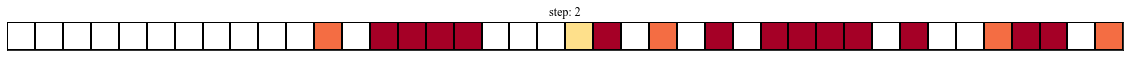

In [264]:
%matplotlib inline 
%config InlineBackend.figure_format = 'svg' 
fig, ax = plt.subplots(figsize=(20,1))

cells = layers[0].astype(float).reshape((1,layers.shape[1]))
left, right = 0, 40

ax.pcolor(cells[:,left:right], cmap="RdYlGn", vmin=0, vmax=5)

ax.tick_params(left=False, labelleft=False, bottom=False, labelbottom=False)
ax.set_xticks(np.arange(right-left+1))
ax.set_yticks([0,1])
ax.grid(color='black', linewidth=2)
ax.set_title(f"step: {2}")
plt.gca().set_aspect('equal', adjustable='box')

plt.show()

MovieWriter ffmpeg unavailable; using Pillow instead.


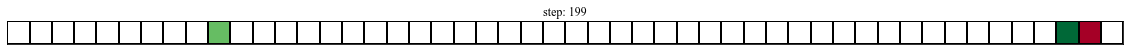

In [265]:
left, right = 0, 50

fig, ax = plt.subplots(figsize=(20,2))

ax.tick_params(left=False, labelleft=False, bottom=False, labelbottom=False)

def animate(i):
    ax.clear()
    cells = layers[i].astype(float).reshape((1,layers.shape[1]))
    line = ax.pcolor(cells[:,left:right], cmap="RdYlGn", vmin=0, vmax=5)
    ax.set_title(f"step: {i}")
    ax.set_xticks(np.arange(right-left+1))
    ax.set_yticks([0,1])
    ax.grid(color='black', linewidth=2)
    plt.gca().set_aspect('equal', adjustable='box')
    return line

#  Создаем объект анимации:
sin_animation = animation.FuncAnimation(fig, 
                                      animate, 
                                      frames=np.arange(0, layers.shape[0]),
                                      interval = 500,
                                      repeat = False)

#  Сохраняем анимацию в виде gif файла:
sin_animation.save('data/animation_slow.gif',
                 writer='ffmpeg',  
                  dpi=300)

### Three line

__Test__

In [8]:
road_param = {
    "N_cells": 1000,
    "N_lane": 3,
}
cars = {model.HumanDriveVehicle: 600}

In [9]:
model_3 = model.Model(road_parametrs=road_param, vehicles=cars)

In [10]:
%%time
model_3.model_stabilization(2000)

CPU times: total: 2min 30s
Wall time: 2min 30s


In [11]:
model_3.model_research(100)

In [12]:
model_3.result

{'rho': 0.19999999999999998,
 'flow': array([0.29543]),
 'change_frequency': 0.7433333333333333}

__Fundamential diagramm__

In [ ]:
core = joblib.cpu_count() - 2
cars_arr = np.arange(3000, step=150)[1:]
cars_arr

In [ ]:
def step(cars):
    road_param = {
        "N_cells": 1000,
        "N_lane": 3,
    }
    cars = {model.HumanDriveVehicle: cars}
    road = model.Model(road_parametrs=road_param, vehicles=cars)
    road.model_stabilization(1000)
    road.model_research(100)
    return road.result

In [ ]:
%%time
tabel_result = Parallel(n_jobs=core, verbose=10)(delayed(step)(cars) for cars in cars_arr)

In [ ]:
result = pd.DataFrame(tabel_result)
result

__Visualization__

In [253]:
road_param = {
    "N_cells": 100,
    "N_lane": 3,
}
cars = {model.HumanDriveVehicle: 50}

In [254]:
model_vis_3 = model.Model(road_parametrs=road_param, vehicles=cars)

In [255]:
%%time
model_vis_3.model_stabilization(1000)

CPU times: total: 7.86 s
Wall time: 8.02 s


In [256]:
model_vis_3.model_research(200, is_diagramm=True)

In [272]:
layers = list()

In [273]:
for layer in model_vis_3.x_t_diagramm.values():
    layers.append(layer)
layers = np.array(layers)

In [274]:
layers.shape

(3, 200, 100)

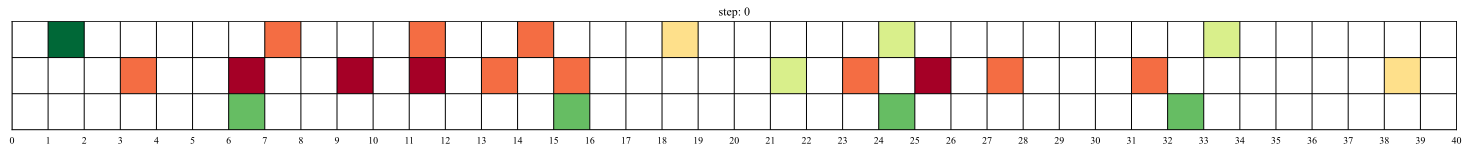

In [297]:
%matplotlib inline 
%config InlineBackend.figure_format = 'svg' 

fig, ax = plt.subplots(figsize=(40,2))

step = 0
cells = layers[:,step,:].astype(float)
left, right = 0, 40

ax.pcolor(cells[:,left:right], cmap="RdYlGn", vmin=0, vmax=5)

ax.tick_params(left=False, labelleft=False, bottom=False, labelbottom=True)
ax.set_xticks(np.arange(right-left+1))
ax.set_yticks([0,1,2])
ax.grid(color='black', linewidth=1)
ax.set_title(f"step: {step}")
plt.gca().set_aspect('equal', adjustable='box')

plt.show()

MovieWriter ffmpeg unavailable; using Pillow instead.


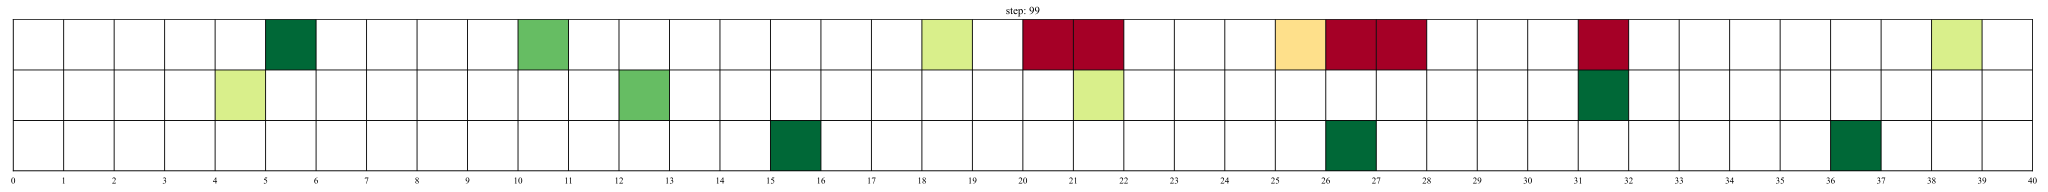

In [300]:
left, right = 0, 40

fig, ax = plt.subplots(figsize=(40,4))

ax.tick_params(left=False, labelleft=False, bottom=False, labelbottom=True)

def animate(i):
    ax.clear()
    cells = layers[:,i,:].astype(float)
    line = ax.pcolor(cells[:,left:right], cmap="RdYlGn", vmin=0, vmax=5)
    ax.set_title(f"step: {i}")
    ax.set_xticks(np.arange(right-left+1))
    ax.set_yticks([0,1,2])
    ax.grid(color='black', linewidth=1)
    plt.gca().set_aspect('equal', adjustable='box')
    return line

#  Создаем объект анимации:
sin_animation = animation.FuncAnimation(fig, 
                                      animate, 
                                      frames=np.arange(0, 100),
                                      interval = 400,
                                      repeat = False)

#  Сохраняем анимацию в виде gif файла:
sin_animation.save('data/animation_3_lane.gif',
                 writer='ffmpeg',  
                  dpi=300)

## Research bus

__Test__

In [3]:
road_param = {
    "N_cells": 1000,
    "N_lane": 1,
}
buses = {model.Bus: 50}
station = tuple([10, 50, 100, 200, 350, 400, 500, 600, 900])

In [4]:
model.Bus.set_station(station)
model_bus = model.Model(road_parametrs=road_param, vehicles=buses)


In [5]:
%%time
model_bus.model_stabilization(1000)

D:\Programs\Anaconda\lib\site-packages\numpy\core\fromnumeric.py:87: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


Wall time: 4.88 s


In [8]:
model_bus.model_research(400)

In [9]:
model_bus.result

{'rho': 0.05, 'flow': array([0.0428125]), 'change_frequency': 0.0}

__Vizualization__

In [11]:
road_param = {
    "N_cells": 100,
    "N_lane": 2,
}
buses = {model.Bus: 5, model.HumanDriveVehicle: 10}
station = tuple([10, 20, 50, 80, 90])

In [12]:
model.Bus.set_station(station)
model_bus =  model.Model(road_parametrs=road_param, vehicles=buses)

In [13]:
%%time
model_bus.model_stabilization(1000)

Wall time: 1.47 s


In [14]:
model_bus.model_research(200, is_diagramm=True)

In [16]:
layers = list()

In [17]:
for layer in model_bus.x_t_diagramm.values():
    layers.append(layer)
layers = np.array(layers)

In [18]:
layers.shape

(2, 200, 100)

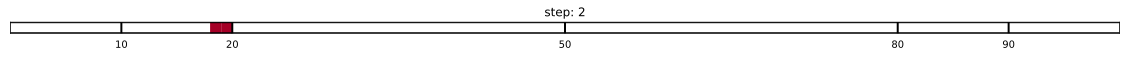

In [9]:
%matplotlib inline 
%config InlineBackend.figure_format = 'svg' 
fig, ax = plt.subplots(figsize=(20,1))

cells = layers[0].astype(float).reshape((1,layers.shape[1]))
left, right = 0, 100

ax.pcolor(cells[:,left:right], cmap="RdYlGn", vmin=0, vmax=5)

ax.tick_params(left=False, labelleft=False, bottom=False, labelbottom=True)
#ax.set_xticks(np.arange(right-left+1))
ax.set_xticks(station)
ax.set_yticks([0,1])
ax.grid(color='black', linewidth=2)
ax.set_title(f"step: {2}")
plt.gca().set_aspect('equal', adjustable='box')

plt.show()

MovieWriter ffmpeg unavailable; using Pillow instead.


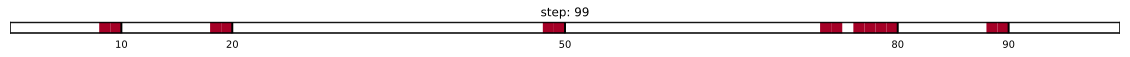

In [10]:
left, right = 0, 100

fig, ax = plt.subplots(figsize=(20,2))

ax.tick_params(left=False, labelleft=False, bottom=False, labelbottom=True)

def animate(i):
    ax.clear()
    cells = layers[i].astype(float).reshape((1,layers.shape[1]))
    line = ax.pcolor(cells[:,left:right], cmap="RdYlGn", vmin=0, vmax=5)
    ax.set_title(f"step: {i}")
    #ax.set_xticks(np.arange(right-left+1))
    ax.set_xticks(station)
    ax.set_yticks([0,1])
    ax.grid(color='black', linewidth=2)
    plt.gca().set_aspect('equal', adjustable='box')
    return line

#  Создаем объект анимации:
sin_animation = animation.FuncAnimation(fig, 
                                      animate, 
                                      frames=np.arange(0, 100),
                                      interval = 200,
                                      repeat = False)

#  Сохраняем анимацию в виде gif файла:
sin_animation.save('data/animation_bus_cars.gif',
                 writer='ffmpeg',  
                  dpi=300)

MovieWriter ffmpeg unavailable; using Pillow instead.


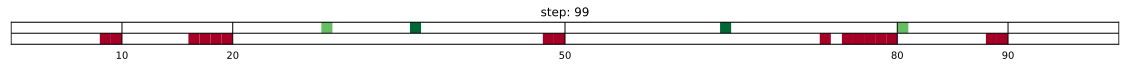

In [19]:
left, right = 0, 100

fig, ax = plt.subplots(figsize=(20,2))

ax.tick_params(left=False, labelleft=False, bottom=False, labelbottom=True)

def animate(i):
    ax.clear()
    cells = layers[:,i,:].astype(float)
    line = ax.pcolor(cells[:,left:right], cmap="RdYlGn", vmin=0, vmax=5)
    ax.set_title(f"step: {i}")
    ax.set_xticks(station)
    ax.set_yticks([0,1,2])
    ax.grid(color='black', linewidth=1)
    plt.gca().set_aspect('equal', adjustable='box')
    return line

#  Создаем объект анимации:
sin_animation = animation.FuncAnimation(fig, 
                                      animate, 
                                      frames=np.arange(0, 100),
                                      interval = 200,
                                      repeat = False)

#  Сохраняем анимацию в виде gif файла:
sin_animation.save('data/animation_bus_cars.gif',
                 writer='ffmpeg',  
                  dpi=300)

## Research cars and bus